In [8]:
#https://rightcode.co.jp/blog/information-technology/pytorch-mnist-learning
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch

In [19]:
class MyNet(torch.nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 1000)
        self.fc2 = torch.nn.Linear(1000, 5000)
        self.fc3 = torch.nn.Linear(5000, 3000)
        self.fc4 = torch.nn.Linear(3000, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        x = self.fc3(x)
        x = torch.sigmoid(x)
        x = self.fc4(x)
        
        return f.log_softmax(x, dim=1)

In [20]:
def load_MNIST(batch=128, intensity=1.0):
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data',
                       train=True,
                       download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x * intensity)
                       ])),
        batch_size=batch,
        shuffle=True)
 
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data',
                       train=False,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x * intensity)
                       ])),
        batch_size=batch,
        shuffle=True)
 
    return {'train': train_loader, 'test': test_loader}

In [21]:
num_epoch = 20
history = {
    'train_loss':[],
    'test_loss':[],
    'test_acc':[]
}

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = MyNet().to(device)
loaders = load_MNIST()


In [22]:
optimizer = torch.optim.Adam(params=net.parameters(), lr=0.001)

In [23]:
for i_epoch in range(num_epoch):
    loss = None
    
    net.train(True)
    
    for i, (data, target) in enumerate(loaders['train']):
        data = data.view(-1, 28*28)
        data = data.to(device)
        target = target.to(device)
        
        optimizer.zero_grad()
        output = net(data)
        loss = f.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        if i % 10 == 0:
            print('Training log: {} epoch ({} / 60000 train. data). Loss: {}'.format(i_epoch+1, (i+1)*128, loss.item()))
    
    history['train_loss'].append(loss)
    
    net.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in loaders['test']:
            data = data.view(-1, 28*28)
            data = data.to(device)
            target = target.to(device)
            
            output = net(data)
            test_loss += f.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    
    test_loss /= 10000
    print('Test loss (avg): {}, Accuracy: {}'.format(test_loss, correct / 10000))
    
    history['test_loss'].append(test_loss)
    history['test_acc'].append(correct / 10000)
    
    

Training log: 1 epoch (128 / 60000 train. data). Loss: 2.297132730484009
Training log: 1 epoch (1408 / 60000 train. data). Loss: 3.287682294845581
Training log: 1 epoch (2688 / 60000 train. data). Loss: 2.4148969650268555
Training log: 1 epoch (3968 / 60000 train. data). Loss: 2.379462957382202
Training log: 1 epoch (5248 / 60000 train. data). Loss: 2.2093350887298584
Training log: 1 epoch (6528 / 60000 train. data). Loss: 2.098137378692627
Training log: 1 epoch (7808 / 60000 train. data). Loss: 1.9702472686767578
Training log: 1 epoch (9088 / 60000 train. data). Loss: 1.8906311988830566
Training log: 1 epoch (10368 / 60000 train. data). Loss: 1.8152360916137695
Training log: 1 epoch (11648 / 60000 train. data). Loss: 1.7271825075149536
Training log: 1 epoch (12928 / 60000 train. data). Loss: 1.797523021697998
Training log: 1 epoch (14208 / 60000 train. data). Loss: 1.5991472005844116
Training log: 1 epoch (15488 / 60000 train. data). Loss: 1.4201130867004395
Training log: 1 epoch (167

Training log: 3 epoch (16768 / 60000 train. data). Loss: 0.30994734168052673
Training log: 3 epoch (18048 / 60000 train. data). Loss: 0.1272897571325302
Training log: 3 epoch (19328 / 60000 train. data). Loss: 0.1817823350429535
Training log: 3 epoch (20608 / 60000 train. data). Loss: 0.053818102926015854
Training log: 3 epoch (21888 / 60000 train. data). Loss: 0.20448726415634155
Training log: 3 epoch (23168 / 60000 train. data). Loss: 0.1272248774766922
Training log: 3 epoch (24448 / 60000 train. data). Loss: 0.04768768325448036
Training log: 3 epoch (25728 / 60000 train. data). Loss: 0.1858079433441162
Training log: 3 epoch (27008 / 60000 train. data). Loss: 0.15829643607139587
Training log: 3 epoch (28288 / 60000 train. data). Loss: 0.1826021820306778
Training log: 3 epoch (29568 / 60000 train. data). Loss: 0.28339141607284546
Training log: 3 epoch (30848 / 60000 train. data). Loss: 0.14161476492881775
Training log: 3 epoch (32128 / 60000 train. data). Loss: 0.18175865709781647
Tra

Training log: 5 epoch (32128 / 60000 train. data). Loss: 0.24437780678272247
Training log: 5 epoch (33408 / 60000 train. data). Loss: 0.12574370205402374
Training log: 5 epoch (34688 / 60000 train. data). Loss: 0.13489016890525818
Training log: 5 epoch (35968 / 60000 train. data). Loss: 0.0463426373898983
Training log: 5 epoch (37248 / 60000 train. data). Loss: 0.16868168115615845
Training log: 5 epoch (38528 / 60000 train. data). Loss: 0.16694751381874084
Training log: 5 epoch (39808 / 60000 train. data). Loss: 0.04495033994317055
Training log: 5 epoch (41088 / 60000 train. data). Loss: 0.03542277216911316
Training log: 5 epoch (42368 / 60000 train. data). Loss: 0.059707507491111755
Training log: 5 epoch (43648 / 60000 train. data). Loss: 0.03304187208414078
Training log: 5 epoch (44928 / 60000 train. data). Loss: 0.0834626629948616
Training log: 5 epoch (46208 / 60000 train. data). Loss: 0.11035919934511185
Training log: 5 epoch (47488 / 60000 train. data). Loss: 0.09799538552761078


Training log: 7 epoch (47488 / 60000 train. data). Loss: 0.02677346020936966
Training log: 7 epoch (48768 / 60000 train. data). Loss: 0.05138743668794632
Training log: 7 epoch (50048 / 60000 train. data). Loss: 0.055919744074344635
Training log: 7 epoch (51328 / 60000 train. data). Loss: 0.07390838116407394
Training log: 7 epoch (52608 / 60000 train. data). Loss: 0.05414098873734474
Training log: 7 epoch (53888 / 60000 train. data). Loss: 0.1026444137096405
Training log: 7 epoch (55168 / 60000 train. data). Loss: 0.1079290509223938
Training log: 7 epoch (56448 / 60000 train. data). Loss: 0.10670012980699539
Training log: 7 epoch (57728 / 60000 train. data). Loss: 0.09251323342323303
Training log: 7 epoch (59008 / 60000 train. data). Loss: 0.03837170451879501
Test loss (avg): 0.09189538135528565, Accuracy: 0.972
Training log: 8 epoch (128 / 60000 train. data). Loss: 0.12038622796535492
Training log: 8 epoch (1408 / 60000 train. data). Loss: 0.06778887659311295
Training log: 8 epoch (268

Training log: 10 epoch (1408 / 60000 train. data). Loss: 0.10315883904695511
Training log: 10 epoch (2688 / 60000 train. data). Loss: 0.060748353600502014
Training log: 10 epoch (3968 / 60000 train. data). Loss: 0.031182214617729187
Training log: 10 epoch (5248 / 60000 train. data). Loss: 0.042178791016340256
Training log: 10 epoch (6528 / 60000 train. data). Loss: 0.07906542718410492
Training log: 10 epoch (7808 / 60000 train. data). Loss: 0.01043025217950344
Training log: 10 epoch (9088 / 60000 train. data). Loss: 0.04035572335124016
Training log: 10 epoch (10368 / 60000 train. data). Loss: 0.013130512088537216
Training log: 10 epoch (11648 / 60000 train. data). Loss: 0.0035030245780944824
Training log: 10 epoch (12928 / 60000 train. data). Loss: 0.11125534772872925
Training log: 10 epoch (14208 / 60000 train. data). Loss: 0.11887209117412567
Training log: 10 epoch (15488 / 60000 train. data). Loss: 0.011793320998549461
Training log: 10 epoch (16768 / 60000 train. data). Loss: 0.0290

Training log: 12 epoch (14208 / 60000 train. data). Loss: 0.05583380535244942
Training log: 12 epoch (15488 / 60000 train. data). Loss: 0.06016145274043083
Training log: 12 epoch (16768 / 60000 train. data). Loss: 0.041442640125751495
Training log: 12 epoch (18048 / 60000 train. data). Loss: 0.03440307825803757
Training log: 12 epoch (19328 / 60000 train. data). Loss: 0.00223434716463089
Training log: 12 epoch (20608 / 60000 train. data). Loss: 0.045601990073919296
Training log: 12 epoch (21888 / 60000 train. data). Loss: 0.0032896846532821655
Training log: 12 epoch (23168 / 60000 train. data). Loss: 0.009611498564481735
Training log: 12 epoch (24448 / 60000 train. data). Loss: 0.0047171227633953094
Training log: 12 epoch (25728 / 60000 train. data). Loss: 0.03409496694803238
Training log: 12 epoch (27008 / 60000 train. data). Loss: 0.004252180457115173
Training log: 12 epoch (28288 / 60000 train. data). Loss: 0.0075593143701553345
Training log: 12 epoch (29568 / 60000 train. data). Lo

Training log: 14 epoch (25728 / 60000 train. data). Loss: 0.011565017513930798
Training log: 14 epoch (27008 / 60000 train. data). Loss: 0.0031452812254428864
Training log: 14 epoch (28288 / 60000 train. data). Loss: 0.005939159542322159
Training log: 14 epoch (29568 / 60000 train. data). Loss: 0.0015690624713897705
Training log: 14 epoch (30848 / 60000 train. data). Loss: 0.00849016010761261
Training log: 14 epoch (32128 / 60000 train. data). Loss: 0.008233025670051575
Training log: 14 epoch (33408 / 60000 train. data). Loss: 0.011952564120292664
Training log: 14 epoch (34688 / 60000 train. data). Loss: 0.03571821376681328
Training log: 14 epoch (35968 / 60000 train. data). Loss: 0.07836838811635971
Training log: 14 epoch (37248 / 60000 train. data). Loss: 0.04621436446905136
Training log: 14 epoch (38528 / 60000 train. data). Loss: 0.0028843246400356293
Training log: 14 epoch (39808 / 60000 train. data). Loss: 0.013926425948739052
Training log: 14 epoch (41088 / 60000 train. data). L

Training log: 16 epoch (38528 / 60000 train. data). Loss: 0.018658149987459183
Training log: 16 epoch (39808 / 60000 train. data). Loss: 0.0238876324146986
Training log: 16 epoch (41088 / 60000 train. data). Loss: 0.0035015903413295746
Training log: 16 epoch (42368 / 60000 train. data). Loss: 0.043658606708049774
Training log: 16 epoch (43648 / 60000 train. data). Loss: 0.0032039061188697815
Training log: 16 epoch (44928 / 60000 train. data). Loss: 0.011658705770969391
Training log: 16 epoch (46208 / 60000 train. data). Loss: 0.037655141204595566
Training log: 16 epoch (47488 / 60000 train. data). Loss: 0.01129651814699173
Training log: 16 epoch (48768 / 60000 train. data). Loss: 0.033766429871320724
Training log: 16 epoch (50048 / 60000 train. data). Loss: 0.005910497158765793
Training log: 16 epoch (51328 / 60000 train. data). Loss: 0.05646355822682381
Training log: 16 epoch (52608 / 60000 train. data). Loss: 0.004601515829563141
Training log: 16 epoch (53888 / 60000 train. data). Lo

Training log: 18 epoch (50048 / 60000 train. data). Loss: 0.000978086143732071
Training log: 18 epoch (51328 / 60000 train. data). Loss: 0.014210289344191551
Training log: 18 epoch (52608 / 60000 train. data). Loss: 0.013902902603149414
Training log: 18 epoch (53888 / 60000 train. data). Loss: 0.02308919094502926
Training log: 18 epoch (55168 / 60000 train. data). Loss: 0.031432874500751495
Training log: 18 epoch (56448 / 60000 train. data). Loss: 0.025022834539413452
Training log: 18 epoch (57728 / 60000 train. data). Loss: 0.005622752010822296
Training log: 18 epoch (59008 / 60000 train. data). Loss: 0.0007462985813617706
Test loss (avg): 0.10167348017692567, Accuracy: 0.9774
Training log: 19 epoch (128 / 60000 train. data). Loss: 0.0280899815261364
Training log: 19 epoch (1408 / 60000 train. data). Loss: 0.0018364563584327698
Training log: 19 epoch (2688 / 60000 train. data). Loss: 0.023870307952165604
Training log: 19 epoch (3968 / 60000 train. data). Loss: 0.010125109925866127
Tra

{'train_loss': [tensor(0.2821, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.1262, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0809, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0497, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.1425, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.1091, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0440, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0801, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0387, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0225, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0153, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0352, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0374, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0675, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0358, device='c

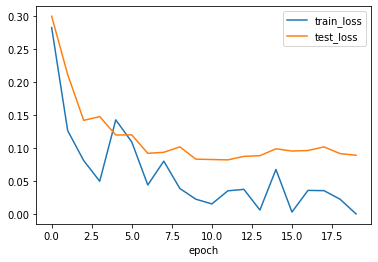

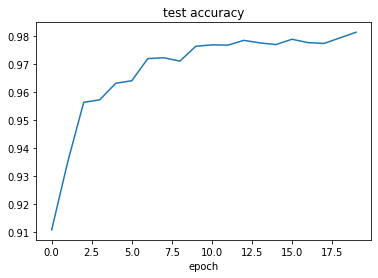

In [24]:
num_epoch
print(history)
plt.figure()
plt.plot(range(len(history['train_loss'])), history['train_loss'], label='train_loss')
plt.plot(range(len(history['test_loss'])), history['test_loss'], label='test_loss')
plt.xlabel('epoch')
plt.legend()
plt.savefig('loss2.png')

plt.figure()
plt.plot(range(len(history['test_acc'])), history['test_acc'])
plt.title('test accuracy')
plt.xlabel('epoch')
plt.savefig('test_acc2.png')